In [2]:
# Call Packages & Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [3]:
# minus font
mpl.rcParams['axes.unicode_minus'] = False

# customize matplotlib
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [4]:
resource_path = os.getcwd() + '/resource/'
resource_path

'E:\\(4-2)PatternRecognition\\Python/resource/'

In [5]:
resource_path = os.getcwd() + '/resource/'
data = pd.read_csv(resource_path + 'traffic.csv', encoding='CP949')
data

,구간 / 차종,평일-1종,평일-2종,평일-3종,평일-4종,평일-5종,주말-1종,주말-2종,주말-3종,주말-4종,주말-5종
0,서울 ~ 신갈JC,181587,6025.0,19206.0,4662.0,2643.0,179502,2862.0,16699.0,2231.0,1092.0
1,신갈JC ~ 수원신갈,209401,7892.0,18725.0,6779.0,4754.0,206806,3407.0,14166.0,2949.0,1727.0
2,수원신갈 ~ 기흥,185465,5997.0,16175.0,6234.0,4255.0,187806,2485.0,12563.0,2615.0,1523.0
3,기흥 ~ 기흥동탄,158334,5258.0,15223.0,5820.0,3948.0,164022,2168.0,12103.0,2462.0,1386.0
4,기흥동탄 ~ 동탄JC,147516,5378.0,13643.0,6142.0,4408.0,156470,2217.0,11469.0,2594.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
582,철마JC ~ 기장일광(KEC),6848,129.0,117.0,170.0,190.0,9454,60.0,66.0,91.0,70.0
583,노포JC2 ~ 노포JC4,20610,604.0,569.0,390.0,550.0,22246,248.0,356.0,172.0,207.0
584,노포JC4 ~ 김해가야휴게소,20610,604.0,569.0,390.0,550.0,22246,248.0,356.0,172.0,207.0
585,진영휴게소 ~ 진영휴게소JC,38,2.0,1.0,2.0,2.0,35,NaN,NaN,NaN,1.0


In [29]:
print(data.columns, len(data.columns), sep = '\n')
data_columns = data.columns[1:]
print(data_columns)
print(data.index[1:587])

Index(['구간 / 차종', '평일-1종', '평일-2종', '평일-3종', '평일-4종', '평일-5종', '주말-1종',
       '주말-2종', '주말-3종', '주말-4종', '주말-5종'],
      dtype='object')
11
Index(['평일-1종', '평일-2종', '평일-3종', '평일-4종', '평일-5종', '주말-1종', '주말-2종', '주말-3종',
       '주말-4종', '주말-5종'],
      dtype='object')
RangeIndex(start=1, stop=587, step=1)


In [30]:
data = data.dropna(axis = 0)

In [31]:
scaler = MinMaxScaler()
# data_scale = pd.DataFrame(scaler.fit_transform(data), columns = data_columns, index = data.index)
data_scale = pd.DataFrame(scaler.fit_transform(data[data_columns]), columns = data_columns, index = data.index)
data_scale

,평일-1종,평일-2종,평일-3종,평일-4종,평일-5종,주말-1종,주말-2종,주말-3종,주말-4종,주말-5종
0,0.867012,0.763101,1.000000,0.406198,0.169957,0.867783,0.839847,1.000000,0.569239,0.248566
1,1.000000,1.000000,0.974940,0.591008,0.307053,1.000000,1.000000,0.848278,0.752683,0.394308
2,0.885554,0.759548,0.842086,0.543431,0.274646,0.907994,0.729063,0.752261,0.667348,0.347487
3,0.755831,0.665778,0.792487,0.507289,0.254708,0.792823,0.635909,0.724708,0.628258,0.316043
4,0.704106,0.681005,0.710170,0.535399,0.284582,0.756253,0.650309,0.686733,0.661983,0.376635
...,...,...,...,...,...,...,...,...,...,...
581,0.052609,0.040350,0.021726,0.055172,0.148656,0.063077,0.029386,0.008925,0.050077,0.156300
582,0.031523,0.014973,0.005470,0.014055,0.010651,0.044342,0.016456,0.003714,0.022483,0.014000
583,0.097324,0.075244,0.029019,0.033261,0.034030,0.106286,0.071701,0.021084,0.043178,0.045444
584,0.097324,0.075244,0.029019,0.033261,0.034030,0.106286,0.071701,0.021084,0.043178,0.045444


In [84]:
pca = PCA(random_state = 1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.819055
1    0.924836
2    0.965890
3    0.986007
4    0.994667
5    0.997071
6    0.998605
7    0.999539
8    0.999794
9    1.000000
dtype: float64

In [33]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

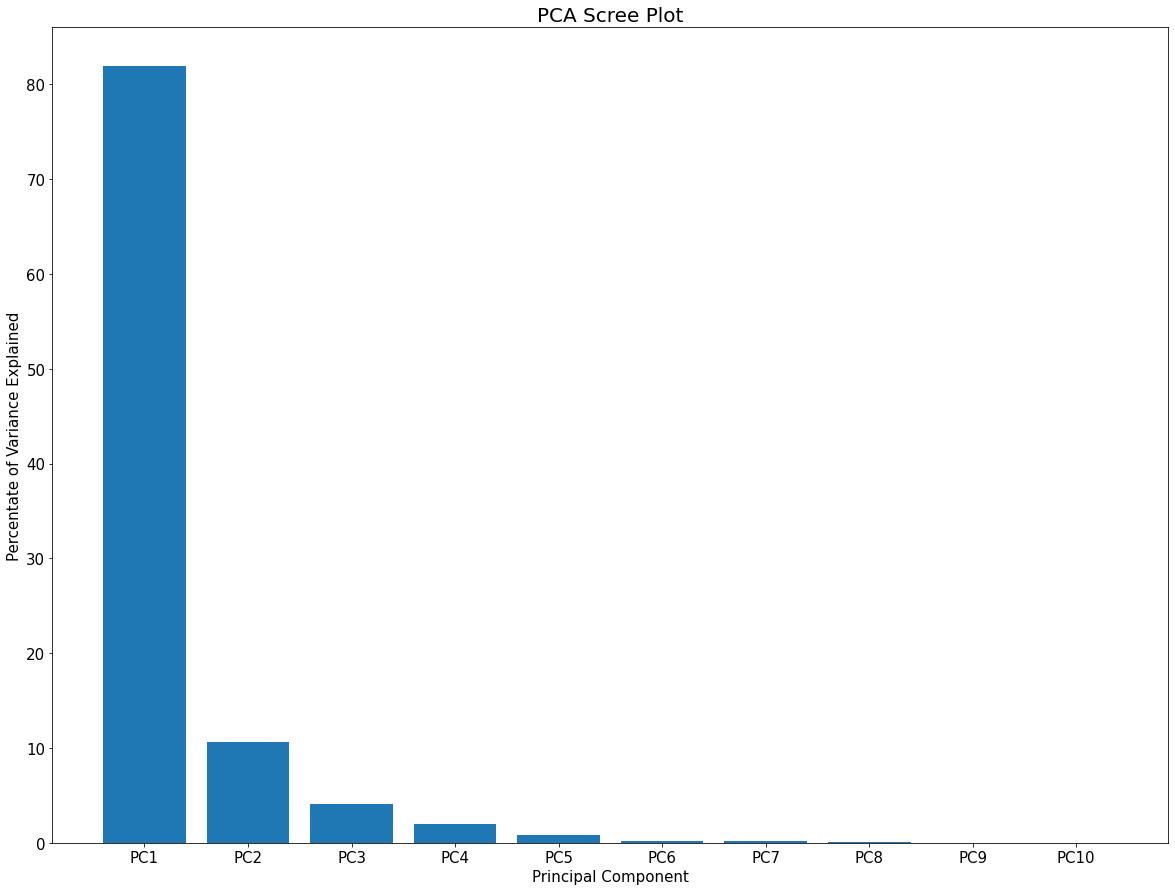

In [34]:
ax = plt.bar(x = range(len(percent_variance)), height = percent_variance, tick_label = columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [35]:
X_pp = pd.DataFrame(X_p[:, :3], columns = ['PC1', 'PC2', 'PC3'], index = data.index)
X_pp

,PC1,PC2,PC3
0,1.440812,0.993599,-0.125163
1,1.844146,0.938282,-0.013822
2,1.482860,0.752138,-0.094106
3,1.280764,0.660784,-0.156315
4,1.284901,0.568376,-0.146625
...,...,...,...
581,-0.392697,-0.070325,0.023646
582,-0.537765,0.068312,-0.025690
583,-0.417075,0.105630,0.017813
584,-0.417075,0.105630,0.017813


In [77]:
print(X_pp["PC1"])

0      1.440812
1      1.844146
2      1.482860
3      1.280764
4      1.284901
         ...   
581   -0.392697
582   -0.537765
583   -0.417075
584   -0.417075
586    0.080394
Name: PC1, Length: 584, dtype: float64


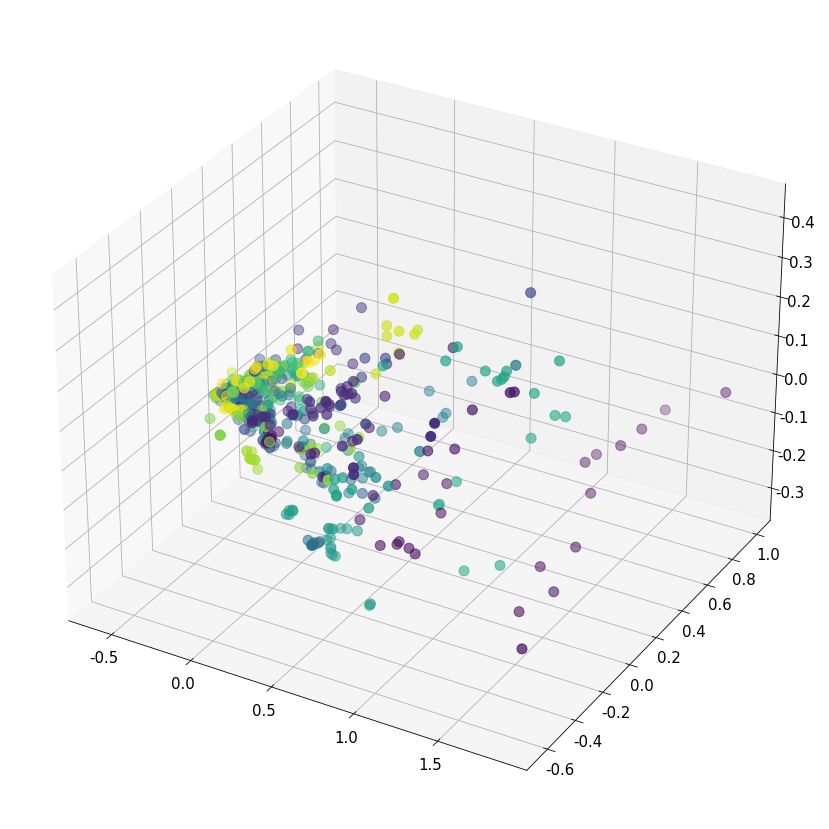

In [78]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X_pp["PC1"], X_pp["PC2"], X_pp["PC3"], s = 100, c = data.index)
plt.show()